Importing the necessary libarires:

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Accessing the CSV from our GitHub repository:

In [45]:
house_data_frame = pd.read_csv("https://raw.githubusercontent.com/xBuki/CS4661/main/HouseRentMisc/House_Rent_Dataset.csv")

Displaying the first few rows of data:

In [46]:
house_data_frame.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


Displaying more rows of data along with how many rows and columns:

In [47]:
print(house_data_frame)

       Posted On  BHK   Rent  Size            Floor    Area Type  \
0     2022-05-18    2  10000  1100  Ground out of 2   Super Area   
1     2022-05-13    2  20000   800       1 out of 3   Super Area   
2     2022-05-16    2  17000  1000       1 out of 3   Super Area   
3     2022-07-04    2  10000   800       1 out of 2   Super Area   
4     2022-05-09    2   7500   850       1 out of 2  Carpet Area   
...          ...  ...    ...   ...              ...          ...   
4741  2022-05-18    2  15000  1000       3 out of 5  Carpet Area   
4742  2022-05-15    3  29000  2000       1 out of 4   Super Area   
4743  2022-07-10    3  35000  1750       3 out of 5  Carpet Area   
4744  2022-07-06    3  45000  1500     23 out of 34  Carpet Area   
4745  2022-05-04    2  15000  1000       4 out of 5  Carpet Area   

                 Area Locality       City Furnishing Status  Tenant Preferred  \
0                       Bandel    Kolkata       Unfurnished  Bachelors/Family   
1     Phool Bagan, Ka

Here we are checking if there are any null or empty values in any column:

In [48]:
house_data_frame.isna().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

All respective columns have their information stored as indicated.

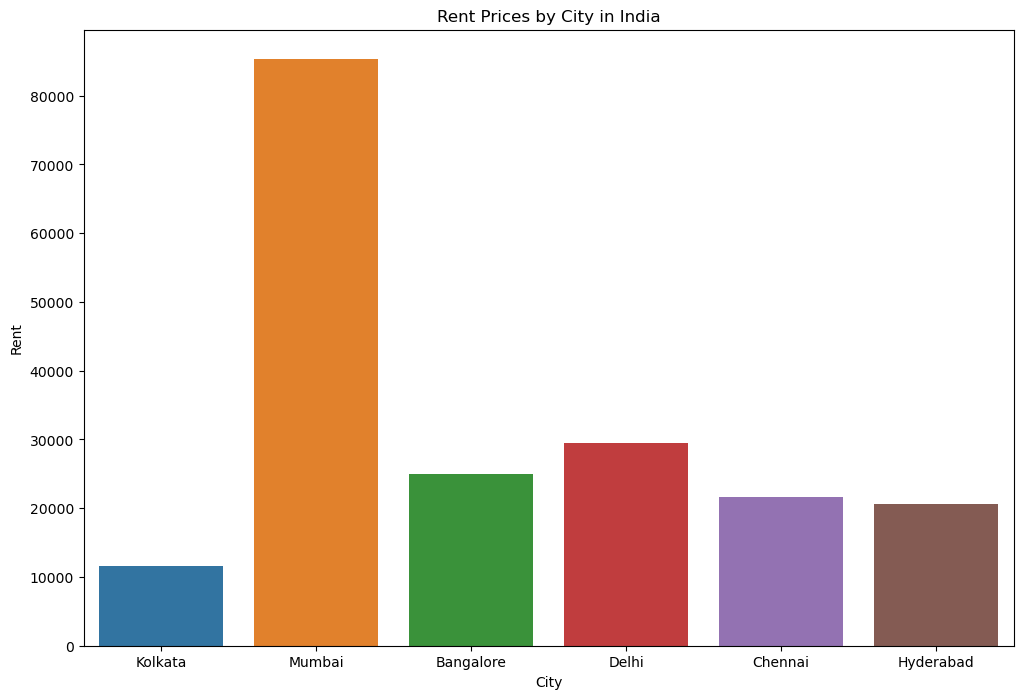

In [36]:
# Creating graph plot to visualize the rent prices between cities.
plt.figure(figsize=(12,8))
sns.barplot(x='City', y='Rent', data=house_data_frame, errorbar=None) 
# Adding labels to the X and Y planes.
plt.xlabel('City')
plt.ylabel('Rent')
# Adding the graph plot title.
plt.title('Rent Prices by City in India')
# Showing the plot.
plt.show()

Dropping Columns as they are not necessary:

In [37]:
house_data_frame = house_data_frame.drop(['Posted On', 'Point of Contact', 'Area Locality', 'Floor'], axis=1)

Label Encoding:

In [38]:
home_features = ['BHK', 'Size', 'Area Type', 'City', 'Furnishing Status', 'Tenant Preferred', 'Bathroom']

labelEncoding_AreaType = LabelEncoder()
house_data_frame['Area Type'] = labelEncoding_AreaType.fit_transform(house_data_frame['Area Type'])

labelCity = LabelEncoder()
house_data_frame['City'] = labelCity.fit_transform(house_data_frame['City'])

labelTenantPreferred = LabelEncoder()
house_data_frame['Tenant Preferred'] = labelTenantPreferred.fit_transform(house_data_frame['Tenant Preferred'])

labelFurnishingStatus = LabelEncoder()
house_data_frame['Furnishing Status'] = labelFurnishingStatus.fit_transform(house_data_frame['Furnishing Status'])

house_data_frame.head()


,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom
0,2,10000,1100,2,4,2,1,2
1,2,20000,800,2,4,1,1,1
2,2,17000,1000,2,4,1,1,1
3,2,10000,800,2,4,2,1,1
4,2,7500,850,1,4,2,0,1
